In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [81]:
sns.set_theme(style='whitegrid')

In [82]:
english_likert = pd.read_csv('finaldata/likertEnglishSLP.csv')
spanish_likert = pd.read_csv('finaldata/likertSpanishSLP.csv')

In [83]:
final_likert = english_likert.append(spanish_likert)
final_likert.columns

/var/folders/t2/8w_43c7s0pz494_6j017xh4m0000gn/T/ipykernel_90901/1722827039.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_likert = english_likert.append(spanish_likert)


Index(['Unnamed: 0', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46'],
      dtype='object')

In [84]:
final_likert = final_likert.reset_index()
final_likert = final_likert.drop(['Unnamed: 0', 'index'], axis=1)
final_likert.to_csv('finaldata/finalLikertSLP.csv')

In [43]:
df = pd.read_csv('finaldata/finalLikertSLP.csv')
df = df.drop(['Unnamed: 0', 'index'], axis=1)
df

,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,...,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46
0,5,5,2,5,5,1,2,1,4,1,...,5,1,1,4,2,1,1,4,3,5
1,4,4,4,5,5,4,2,2,2,2,...,4,1,4,2,2,2,2,2,1,5
2,5,4,4,4,5,4,2,1,1,1,...,4,3,1,3,2,2,2,2,1,5
3,4,4,4,4,4,2,2,2,4,4,...,4,2,2,3,4,2,2,4,2,4
4,5,5,5,5,5,2,1,4,4,1,...,5,1,4,1,1,2,1,4,4,5
5,5,2,5,3,5,2,4,5,2,3,...,3,2,5,1,1,3,1,2,5,4
6,5,5,3,4,5,2,1,4,1,2,...,4,1,4,2,1,2,2,2,4,5
7,5,4,3,4,4,2,2,3,2,3,...,3,2,3,3,1,1,3,3,5,5
8,5,5,5,4,5,3,2,4,2,3,...,5,2,4,2,1,3,2,4,3,5
9,5,5,2,4,5,2,1,4,3,2,...,5,1,4,2,1,1,1,3,4,5


In [44]:
knowledge_of_intervention = ['Q24', 'Q29', 'Q33','Q35', 'Q36', 'Q43']
religion = ['Q27', 'Q30', 'Q34', 'Q39', 'Q42', 'Q45']
socioeconomic_status = ['Q25', 'Q31', 'Q37', 'Q40', 'Q44', 'Q46']
stigmas_perception = ['Q23', 'Q26', 'Q28', 'Q32', 'Q38', 'Q41']

In [45]:
def getChart(questions, title):
    df = pd.read_csv('finaldata/finalLikertSLP.csv')
    df = df[questions]
    table = df.describe().T
    sns.set(rc = {'figure.figsize':(8,8)})
    fig = sns.barplot(data=table, x=questions, y='mean').set(title=title)
    plt.savefig(f'images/{title}.png')

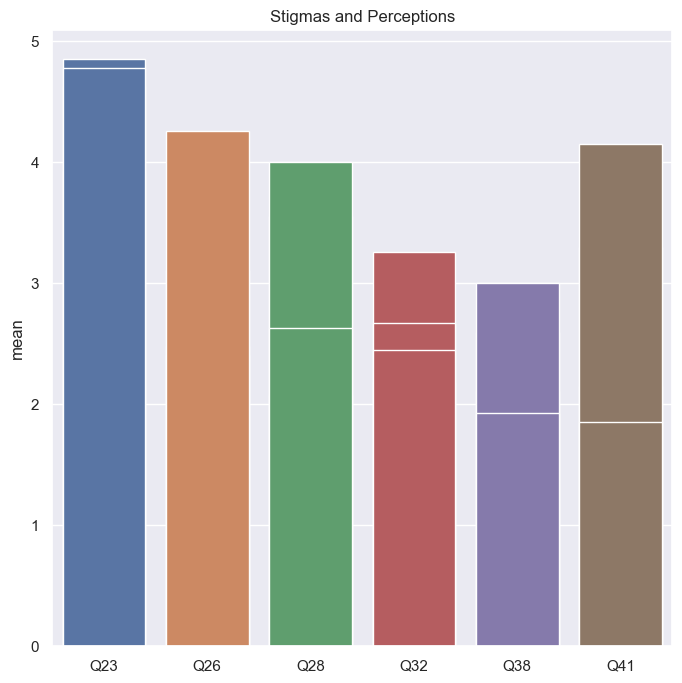

In [46]:
getChart(knowledge_of_intervention, 'Knowledge of Intervention')
getChart(religion, 'Religion')
getChart(socioeconomic_status, 'Socioeconomic Status')
getChart(stigmas_perception, 'Stigmas and Perceptions')

In [67]:
likert_score_knowledge = df[knowledge_of_intervention].sum()
likert_score_religion = df[religion].sum()
likert_score_socioeconomic = df[socioeconomic_status].sum()
likert_score_stigma = df[stigmas_perception].sum()

In [68]:
a = list(likert_score_knowledge.values)
b = list(likert_score_religion.values)
c = list(likert_score_socioeconomic)
d = list(likert_score_stigma)

In [79]:
stats.kruskal(a, b, c, d)

KruskalResult(statistic=3.006666666666675, pvalue=0.3905984490585513)